In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree


In [2]:

# Load the dataset
df = pd.read_csv('creditcard.csv')

In [3]:

# Display dataset information
print(df.columns)
print(df.info())


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284

In [4]:

# Check for missing values
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


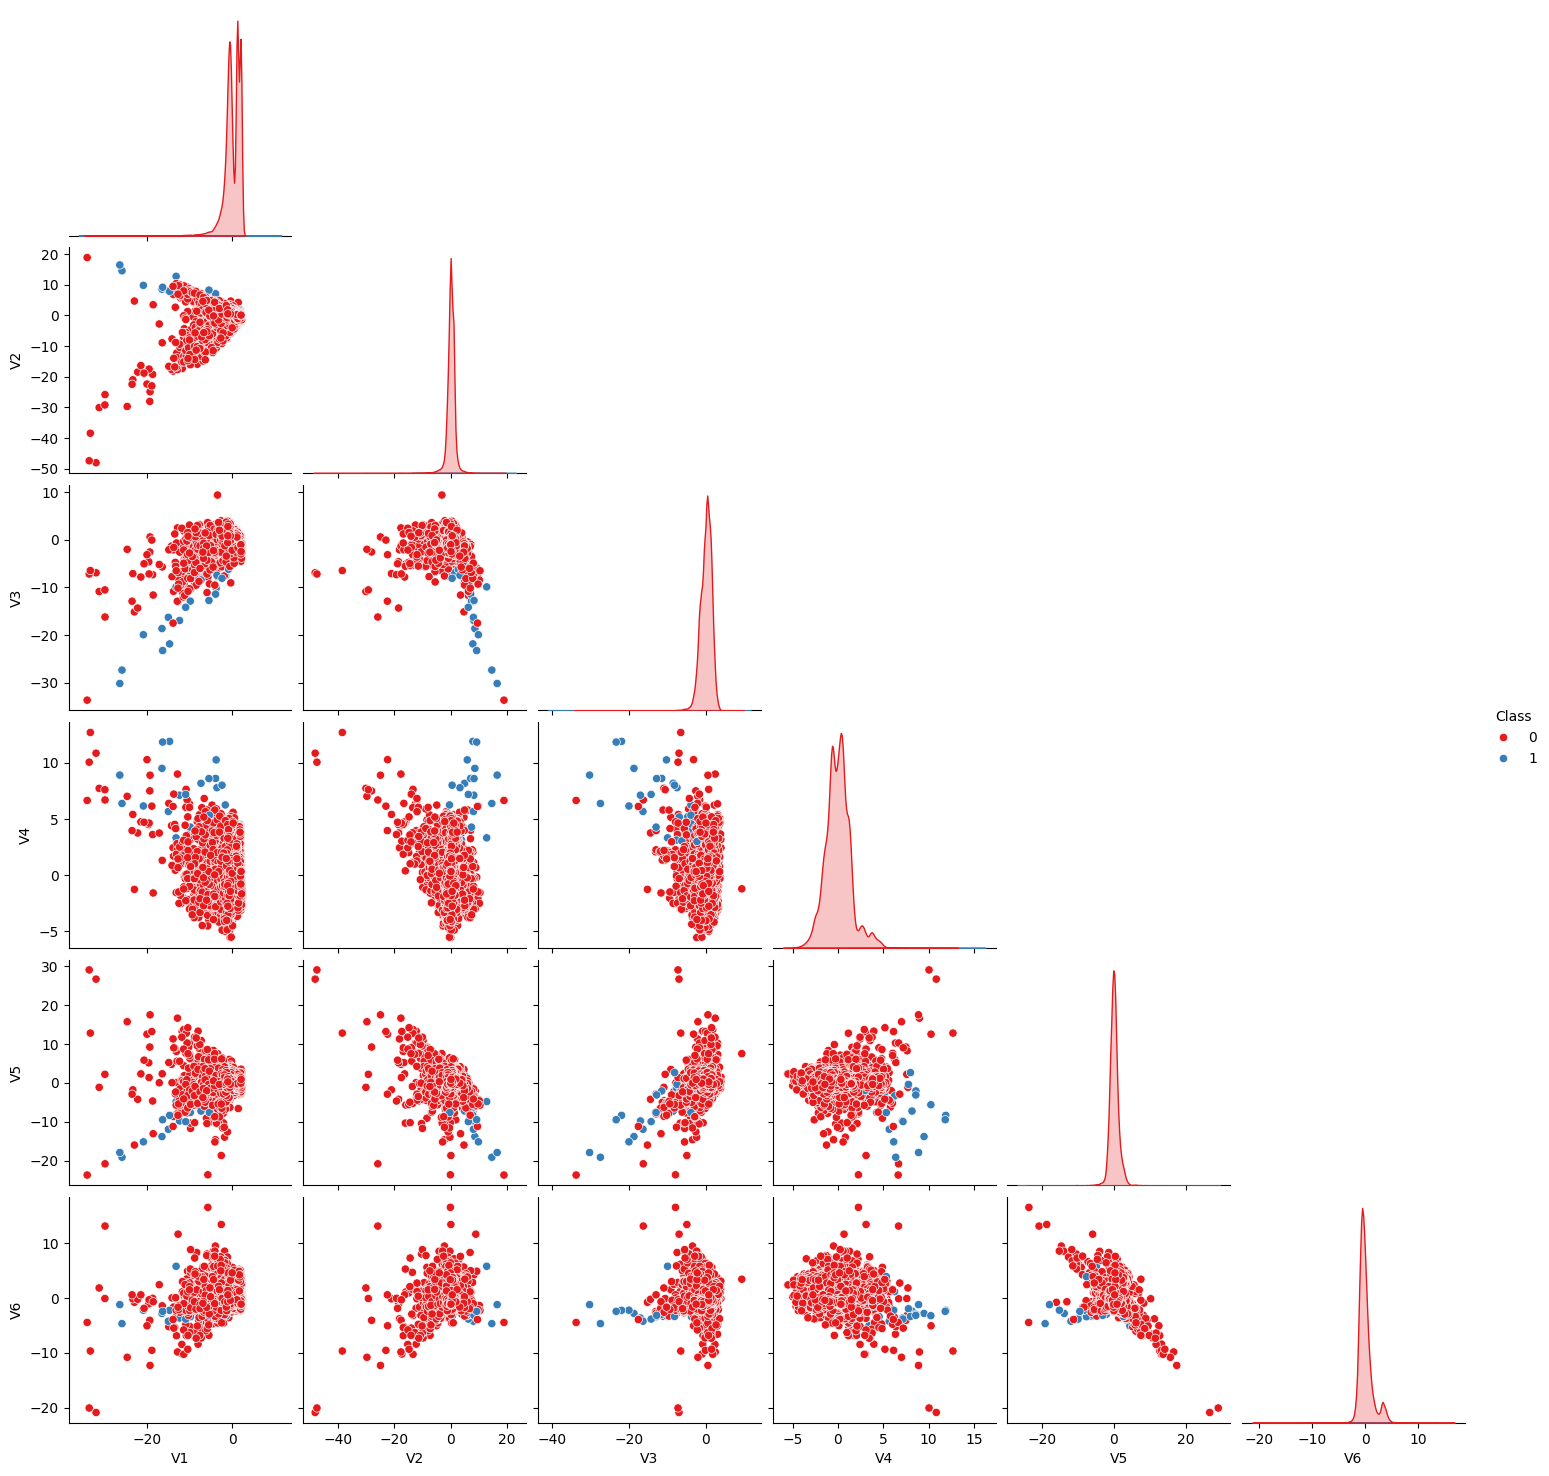

In [6]:
# Select a subset of features to reduce the number of plots
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6']  # Modify this list as needed

# Sample a smaller fraction of the data (10% in this case)
sample_df = df.sample(frac=0.1, random_state=42)

# Create a pairplot with fewer plots and a reduced dataset
sns.pairplot(sample_df[selected_features + ['Class']], hue='Class', palette='Set1', corner=True)

# Show the plot
plt.show()

In [7]:

# Prepare training and test sets
X = df.drop('Class', axis=1)  # Features
y = df['Class']               # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Initialize and train the decision tree classifier
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_train, y_train)

# Predict on the test data
y_pred = dtree.predict(X_test)


In [8]:

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.74      0.76       147

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



Confusion Matrix:


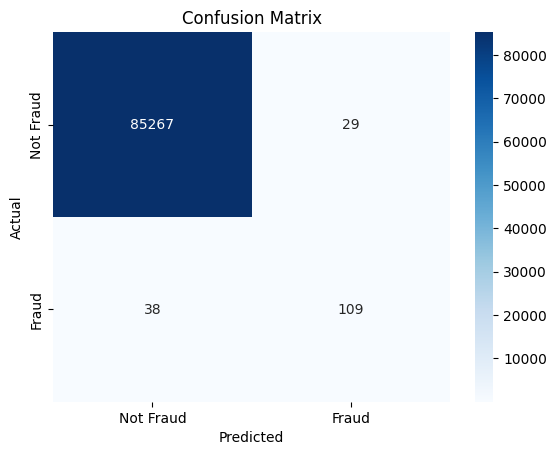

In [9]:

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


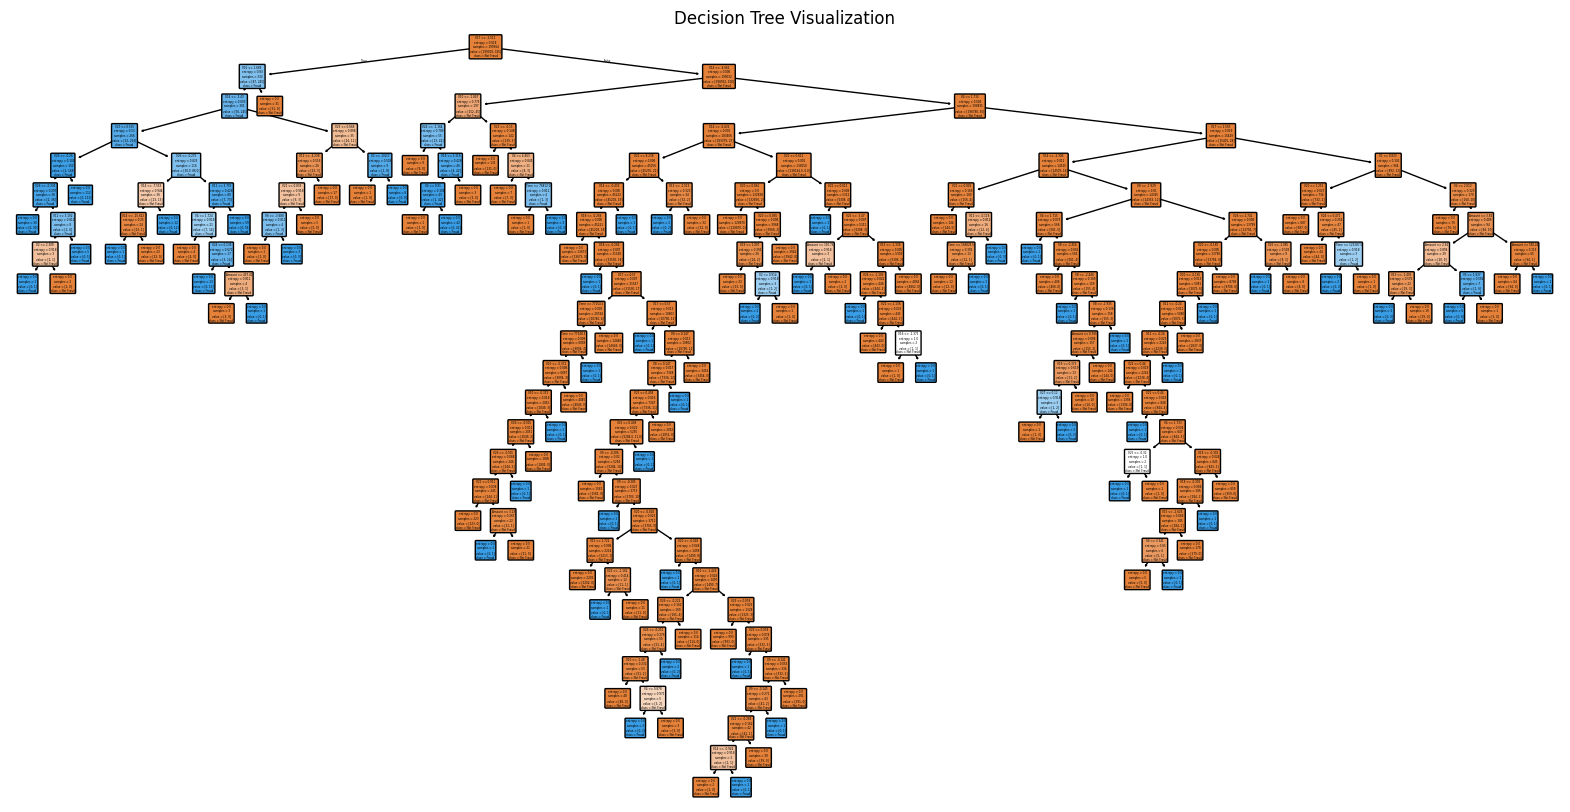

In [10]:

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [11]:



# Calculate feature importance
feature_importance = pd.DataFrame(dtree.feature_importances_,
                                   index=X.columns,
                                   columns=["Importance"]).sort_values("Importance", ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
        Importance
V17       0.597629
V14       0.130951
V10       0.050054
V4        0.028196
V20       0.026114
V26       0.021728
V21       0.019135
Amount    0.013228
V8        0.012795
V18       0.012090
V24       0.011234
V12       0.010617
V22       0.008261
V25       0.007923
Time      0.007897
V23       0.007246
V9        0.006706
V13       0.005404
V11       0.005105
V1        0.004704
V19       0.003472
V15       0.003456
V2        0.002741
V5        0.001131
V6        0.000886
V27       0.000752
V16       0.000546
V3        0.000000
V7        0.000000
V28       0.000000
